In [13]:
from scipy.io import loadmat
import os
import os.path
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
cwd = '/home/datascience/workspace/users/ryan/ADE20K/'
mat_ADE_cols ='filename,folder,typeset,scene,objectIsPart,objectPresence,'\
              'objectcounts,objectnames,proportionClassIsPart,'\
              'wordnet_found,wordnet_level1,wordnet_synset,'\
              'wordnet_hypernym,wordnet_gloss,wordnet_synonyms,wordnet_frequency'
mat_ADE_cols=mat_ADE_cols.split(',')
filetypes = ['_atr.txt','_seg.png','_parts_1.png','_parts_2.png','_parts_3.png']
atr_cols = ['instance_num', 'part_level', 'occluded', 'class_name', 'name', 'attributes']
load_mat = loadmat(cwd + '/ADE20K_2016_07_26' + '/index_ade20k.mat')

In [8]:
# Create file df and object df
ade_files_csv = pd.DataFrame()
ade_objects_csv = pd.DataFrame()

for u, i in enumerate(mat_ADE_cols):
    if u <4:
        ade_files_csv[i] = load_mat['index'][i][0][0].ravel()
    elif u>=4 and u <6:
        ade_files_csv[i] = list(load_mat['index'][i][0][0].T)
        ade_objects_csv[i] = list(load_mat['index'][i][0][0])
    else:
        ade_objects_csv[i] = load_mat['index'][i][0][0].ravel()

r = range(len(ade_files_csv))
m = [(str(ade_files_csv.folder.iloc[i][0])+'/'+str(ade_files_csv.filename.iloc[i][0])) for i in r]        

for f in filetypes[1:]:
    ade_files_csv[f]=[os.path.isfile(cwd+i[:-4]+f) for i in m]

In [16]:
ade_objects_csv.head()

,objectIsPart,objectPresence,objectcounts,objectnames,proportionClassIsPart,wordnet_found,wordnet_level1,wordnet_synset,wordnet_hypernym,wordnet_gloss,wordnet_synonyms,wordnet_frequency
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,[-],0.0,0,[],[[]],[[]],[[]],[[]],0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,[aarm panel],0.0,1,[arm],[arm. armrest. rest. support. device. instrume...,"[[[arm]], [[armrest]], [[rest]], [[support]], ...",[the part of an armchair or sofa that supports...,[arm],1
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,[abacus],0.0,1,[abacus],"[abacus. calculator, calculating machine. mach...","[[[abacus]], [[calculator, calculating machine...",[a calculator that performs arithmetic functio...,[abacus],0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"[accordion, piano accordion, squeeze box]",0.0,1,"[accordion, piano accordion, squeeze box]","[accordion, piano accordion, squeeze box. free...","[[[accordion, piano accordion, squeeze box]], ...",[a portable box-shaped free-reed instrument; t...,"[accordion, piano accordion, squeeze box]",0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11.0,[acropolis],0.0,1,[acropolis],"[acropolis. bastion, citadel. stronghold, fast...","[[[acropolis]], [[bastion, citadel]], [[strong...",[the citadel in ancient Greek towns],[acropolis],0


In [17]:
ade_files_csv.head()

,filename,folder,typeset,scene,objectIsPart,objectPresence,_seg.png,_parts_1.png,_parts_2.png,_parts_3.png
0,[ADE_train_00000001.jpg],[ADE20K_2016_07_26/images/training/a/airport_t...,1,[airport_terminal],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,False,False,False
1,[ADE_train_00000002.jpg],[ADE20K_2016_07_26/images/training/a/airport_t...,1,[airport_terminal],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",True,True,True,False
2,[ADE_train_00000003.jpg],[ADE20K_2016_07_26/images/training/a/art_gallery],1,[art_gallery],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,False
3,[ADE_train_00000004.jpg],[ADE20K_2016_07_26/images/training/b/badlands],1,[badlands],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,False,False,False
4,[ADE_train_00000005.jpg],[ADE20K_2016_07_26/images/training/b/ball_pit],1,[ball_pit],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,False,False


In [19]:
ade_files_csv.to_csv('ADE20K_data.csv')
ade_objects_csv.to_csv('ADE20K_objects.csv')

In [10]:
scene_vis = ade_files_csv.scene.value_counts()[1:25]
x,y = [i[0] for i in scene_vis.index.values], scene_vis.values

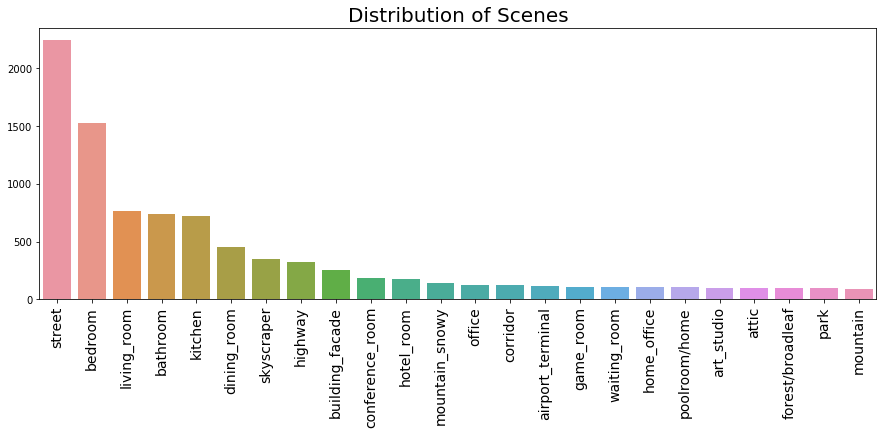

In [11]:
plt.figure(figsize= (15,5))
sns.barplot(x,y)
plt.xticks(rotation=90, fontsize=14)
plt.title('Distribution of Scenes',fontsize=20)
plt.show()